Principal component analysis (PCA)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import math
from umap import UMAP
from sklearn.manifold import TSNE



C:\Users\AJOY DEY\AppData\Local\Temp\ipykernel_7596\711201359.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math
C:\Users\AJOY DEY\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
data = np.loadtxt('pca_data.txt')

In [25]:

data = (data - np.min(data))/ (np.max(data) - np.min(data))

In [26]:
matrix_covarience = np.cov(data.T)

In [27]:
matrix_covarience

array([[ 1.67101471e-03,  2.04937342e-03,  2.55213528e-04, ...,
        -3.02970020e-03,  1.26142121e-03,  8.76347718e-04],
       [ 2.04937342e-03,  8.32400181e-03, -6.49468727e-03, ...,
        -7.92556029e-03,  9.47849041e-03, -1.39717676e-03],
       [ 2.55213528e-04, -6.49468727e-03,  9.18204299e-03, ...,
         4.28595865e-03, -9.84167120e-03,  3.57604086e-03],
       ...,
       [-3.02970020e-03, -7.92556029e-03,  4.28595865e-03, ...,
         9.06825693e-03, -8.04083827e-03,  3.72937717e-05],
       [ 1.26142121e-03,  9.47849041e-03, -9.84167120e-03, ...,
        -8.04083827e-03,  1.26241671e-02, -3.10827078e-03],
       [ 8.76347718e-04, -1.39717676e-03,  3.57604086e-03, ...,
         3.72937717e-05, -3.10827078e-03,  2.05963444e-03]])

In [28]:
val_eigen , vec_eigen = np.linalg.eigh(matrix_covarience)

In [29]:
val_eigen

array([1.83022541e-05, 1.92369630e-05, 2.04324720e-05, 2.13443611e-05,
       2.17864732e-05, 2.21142357e-05, 2.28772353e-05, 2.30073669e-05,
       2.38548958e-05, 2.41662721e-05, 2.47430759e-05, 2.51883137e-05,
       2.55124282e-05, 2.63414692e-05, 2.70964504e-05, 2.76385742e-05,
       2.78341212e-05, 2.83168298e-05, 2.88342818e-05, 2.91826558e-05,
       2.92636347e-05, 2.98699122e-05, 3.04939202e-05, 3.06616603e-05,
       3.14707628e-05, 3.15807762e-05, 3.21297786e-05, 3.26044502e-05,
       3.31053934e-05, 3.39019738e-05, 3.43018652e-05, 3.44345086e-05,
       3.50523896e-05, 3.51519963e-05, 3.60494391e-05, 3.64475985e-05,
       3.65840087e-05, 3.71845503e-05, 3.74490972e-05, 3.78233049e-05,
       3.80413734e-05, 3.83413043e-05, 3.92088031e-05, 4.07094267e-05,
       4.11634951e-05, 4.13595232e-05, 4.17482178e-05, 4.22861991e-05,
       4.27844291e-05, 4.31294821e-05, 4.37996825e-05, 4.42205433e-05,
       4.45749600e-05, 4.50709466e-05, 4.56033245e-05, 4.58585020e-05,
      

In [31]:

idx = np.argsort(np.abs(val_eigen))[::-1]

vec_eigen = vec_eigen[:,idx]
val_eigen = val_eigen[idx]

val_eigen = val_eigen[:2]
vec_eigen = vec_eigen[:,:2]


In [32]:
result = np.dot(data,vec_eigen)

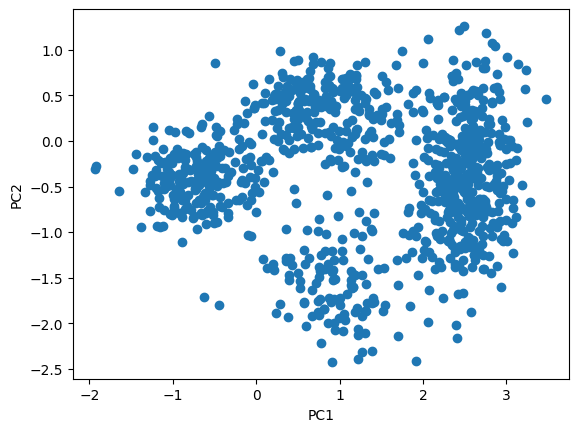

In [33]:
x = result[:,0]
y = result[:,1]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x,y)
plt.show()

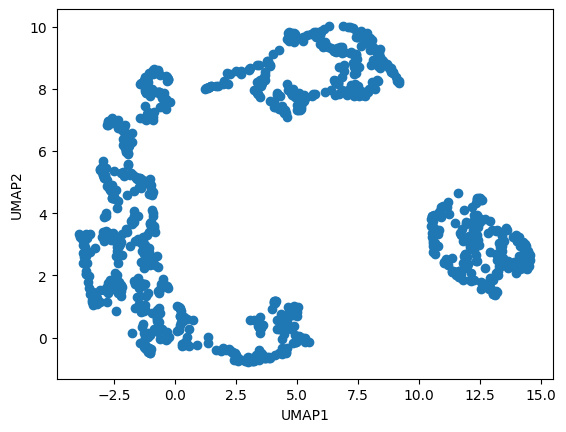

In [34]:
data_1 = UMAP().fit_transform(data)

x1 = data_1[:,0]
y1 = data_1[:,1]
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.scatter(x1,y1)
plt.show()

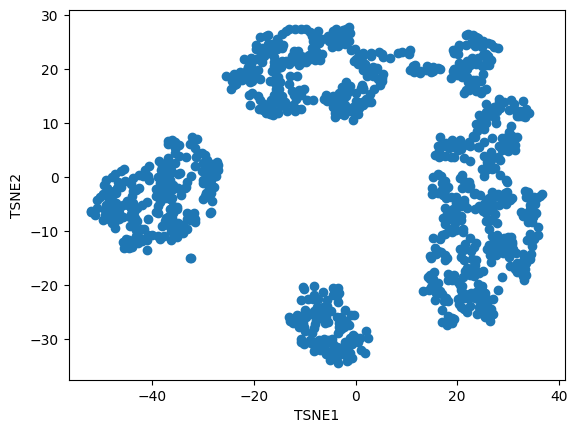

In [35]:
data_2 = TSNE().fit_transform(data)
x2 = data_2[:,0]
y2 = data_2[:,1]
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.scatter(x2,y2)
plt.show()


Expectation-Maximization (EM) algorithm

In [36]:

def param_init(number_of_components,data):
    weights = np.full(number_of_components,1/number_of_components)
    poisson_lambda = np.random.uniform(low=np.min(data),high=np.max(data),size=number_of_components)
    #print(poisson_lambda)
    #print(weights)
    return poisson_lambda,weights

In [38]:
def Expectation_step(data,poisson_lambda,weights):
    number_of_components = len(poisson_lambda)
    Number_of_data = len(data)
    expectation = np.zeros((Number_of_data,number_of_components))
    for i in range(Number_of_data):
        for j in range(number_of_components):
            expectation[i,j] = weights[j] * (((poisson_lambda[j]**data[i]) * np.exp(-poisson_lambda[j]))/math.factorial(int(data[i])))
        #i do normalization here
        expectation[i,:] = expectation[i,:]/np.sum(expectation[i,:])
    return expectation

In [39]:
def Maximization_step(data,expectation):
    number_of_components = expectation.shape[1]
    Number_of_data = len(data)
    weights = np.zeros(number_of_components)
    poisson_lambda = np.zeros(number_of_components)

    for j in range(number_of_components):
        
        for i in range(Number_of_data):
            weights[j] = weights[j] + expectation[i,j]
            poisson_lambda[j] = poisson_lambda[j] + expectation[i,j]*data[i]
        
        poisson_lambda[j] = poisson_lambda[j]/weights[j]
        weights[j] = weights[j]/Number_of_data
    
    return poisson_lambda,weights

In [40]:
def Algorithm_EM(data,number_of_components,iterations):
    #initialize the parameters of the model randomly
    weights = np.full(number_of_components,1/number_of_components)

    poisson_lambda = np.random.uniform(low=np.min(data),high=np.max(data),size=number_of_components)

    #print(poisson_lambda)
    #print(weights)
    for i in range(iterations):
        expectation = Expectation_step(data,poisson_lambda,weights)
        #print(expectation)
        poisson_lambda,weights = Maximization_step(data,expectation)
        #print(poisson_lambda)
    return poisson_lambda,weights


In [41]:
Dataset = np.loadtxt('em_data.txt')

In [42]:
number_of_components = 2

number_of_itarations = 100

poisson_lambda,weights = Algorithm_EM(Dataset,number_of_components,number_of_itarations)




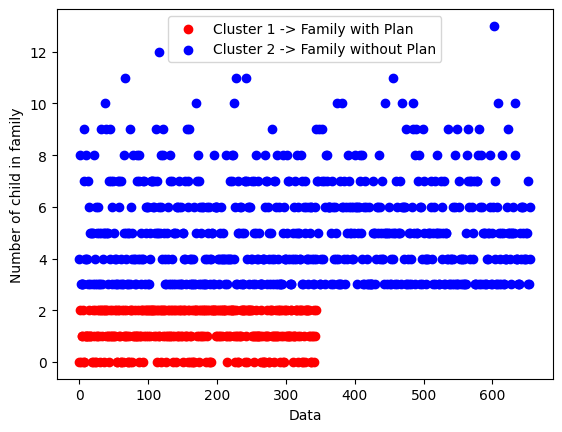

In [43]:
final_expectation = Expectation_step(Dataset,poisson_lambda,weights)
assing_cluster = np.argmax(final_expectation,axis=1)

color_of_cluster = ['red','blue']
label_of_cluster = ['Cluster 1 -> Family with Plan','Cluster 2 -> Family without Plan']

for i in range(number_of_components):
    data_of_cluster = Dataset[assing_cluster == i]
    plt.scatter(np.arange(len(data_of_cluster)),data_of_cluster,color = color_of_cluster[i],label = label_of_cluster[i])
plt.xlabel('Data')
plt.ylabel('Number of child in family')   
plt.legend()
plt.show()




In [44]:

if(poisson_lambda[0] < poisson_lambda[1]):
    
    print(f"Mean Number Of Childrens with Family Planning : {poisson_lambda[0]}")
    print(f"Mean Number Of Childrens without Family Planning : {poisson_lambda[1]}")

    print(f"The Portion of Families with Family Planning : {weights[0]}")
    print(f"The Portion of Families without Family Planning : {weights[1]}")
else:
    print(f"Mean Number Of Childrens with Family Planning : {poisson_lambda[1]}")
    print(f"Mean Number Of Childrens without Family Planning : {poisson_lambda[0]}")

    print(f"The Portion of Families with Family Planning : {weights[1]}")
    print(f"The Portion of Families without Family Planning : {weights[0]}")
    




Mean Number Of Childrens with Family Planning : 1.7980605129686908
Mean Number Of Childrens without Family Planning : 4.924032456067782
The Portion of Families with Family Planning : 0.36053825068898654
The Portion of Families without Family Planning : 0.6394617493110144
